# Daily Bike Rental Base Prediction

## Part-I [Loading the Dataset]

In [1]:
# Importing all the liberaries required to build the model from scratch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
# Importing drive from google.colab to mount and select the dataset uploded in the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset in a variable named day, since the dataset is about rental services on daily basis
day = pd.read_csv('/content/drive/MyDrive/folder_data_test/prediction_model_datasets/day.csv')

In [4]:
# The top five records of database
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Now** that dataset is loaded, it is now time to move towards next step, i.e. core Exploratory Data Analysis(EDA).

## Part-II [EDA]

### General Info of the dataset

In [5]:
# Lets see the overall data in the dataset
print(day)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0      

Dataset Info,

**Name:** Bike Rental Sharing

The dataset is actuaally the collection of 2 different data for bike rental sharing, namely day.csv and hour.csv. The day.csv data used for this project is the daily count of rental bikes in between 2011 and 2012  in Capital bike share system with the corresponding information of weather and season.  


In [6]:
# Checking out the columns in the dataset
print(day.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [7]:
# Now to see the dataset info of each features
print(day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [8]:
# Checking the stats and central tendency of the datafrafe we can figureout some details
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Checking null values in dataset

In [9]:
print(day.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


There are no any missing data in the dataset so, it is now okay to move forward.

### Removing unwanted columns from the dataset

In [10]:
# The dataset has instant column with serial number and dteday, which might be date but contains date which is not required further and also casual and registered
day = day.drop(columns=['instant', 'dteday', 'casual', 'registered'])
# Removing those two columns leaves only 14 columns in dataset

### Analyzing the dataset with Visualization

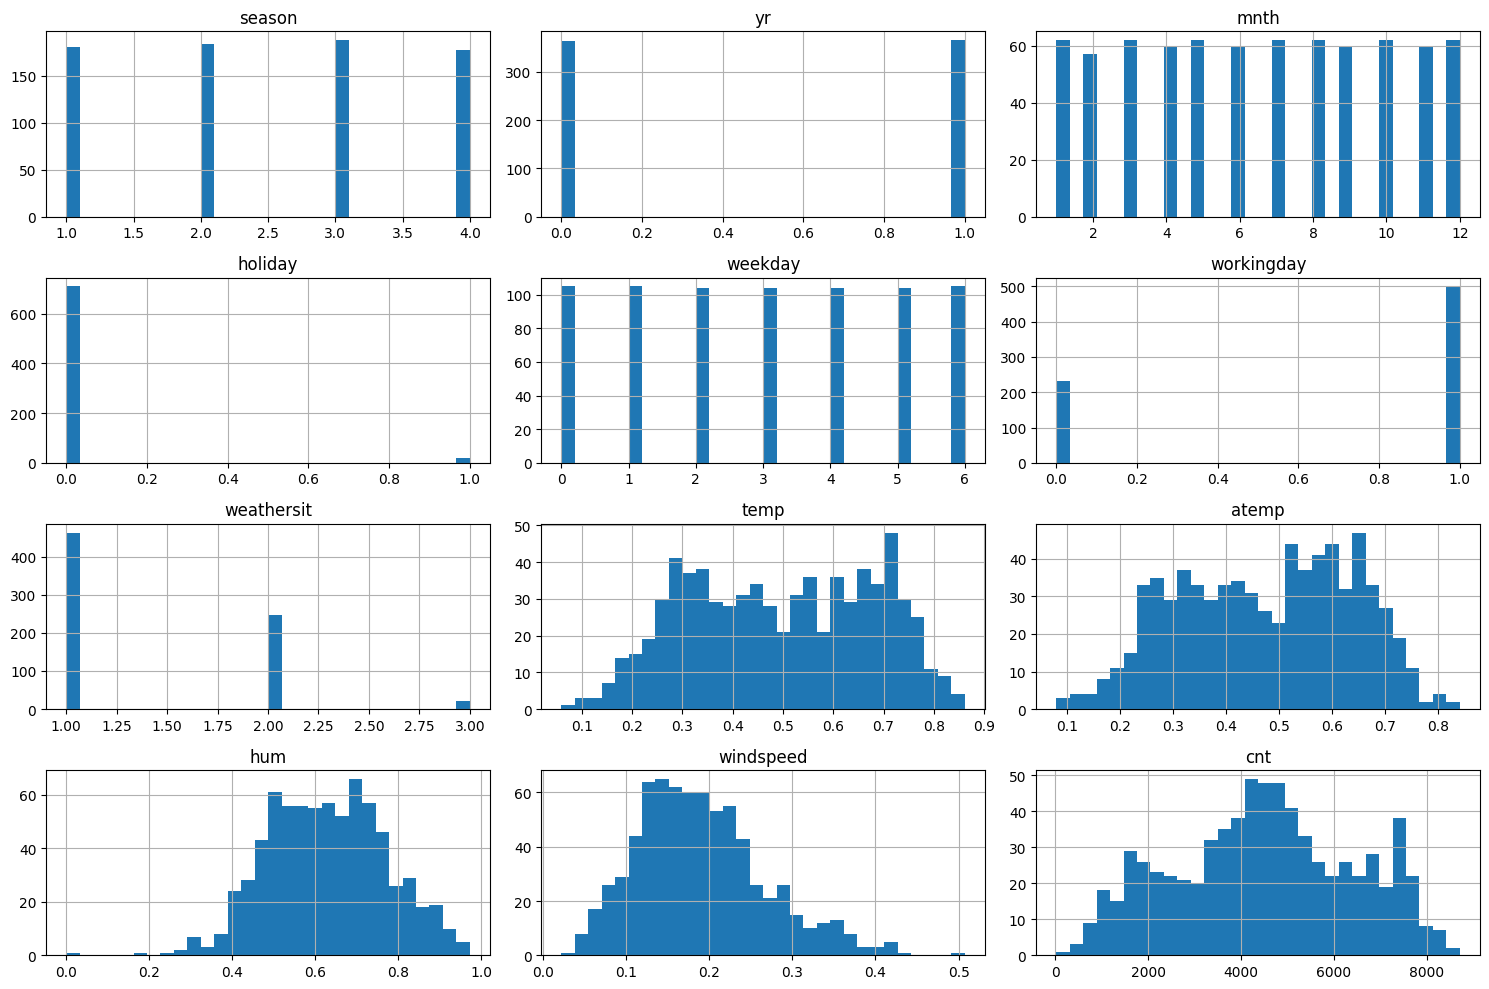

In [11]:
# Visualization with histogram plot for every columns
day.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

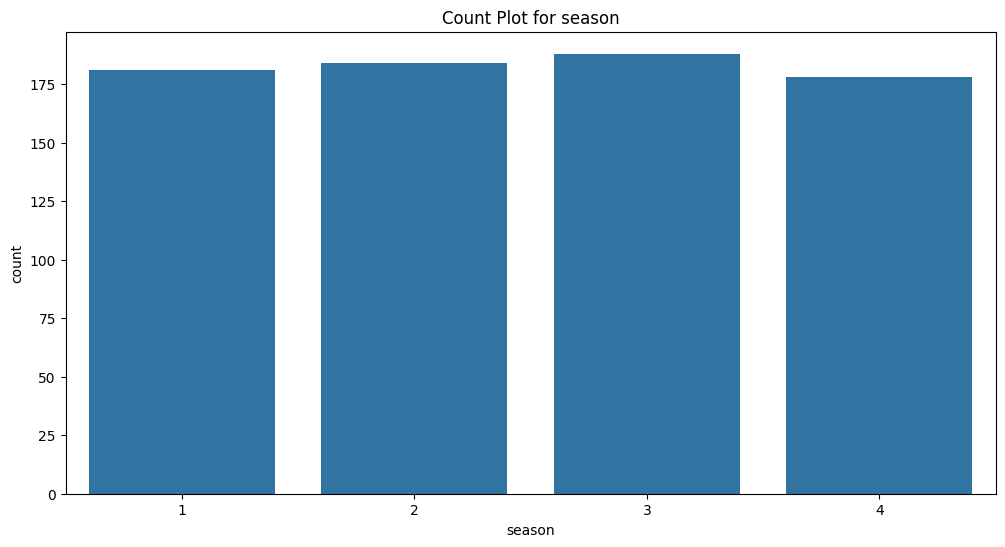

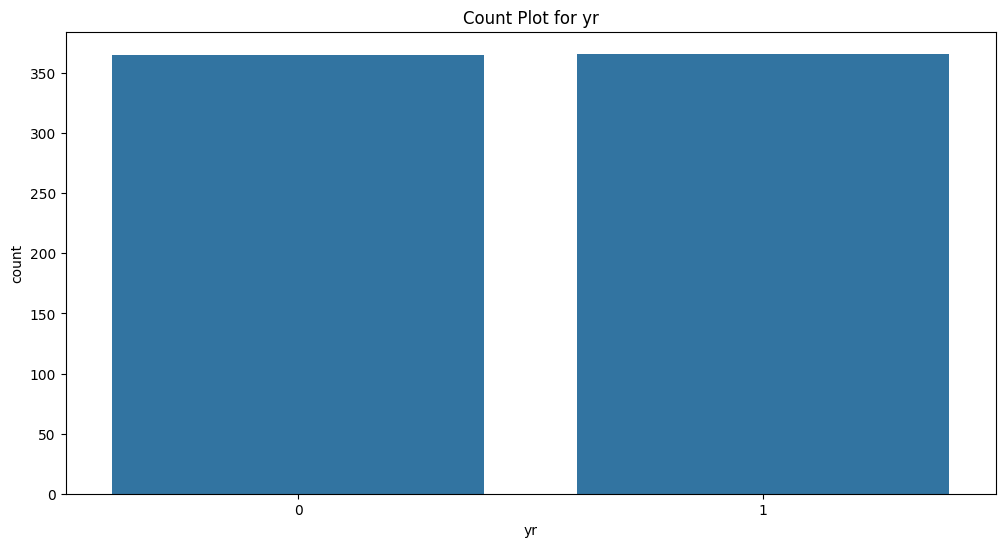

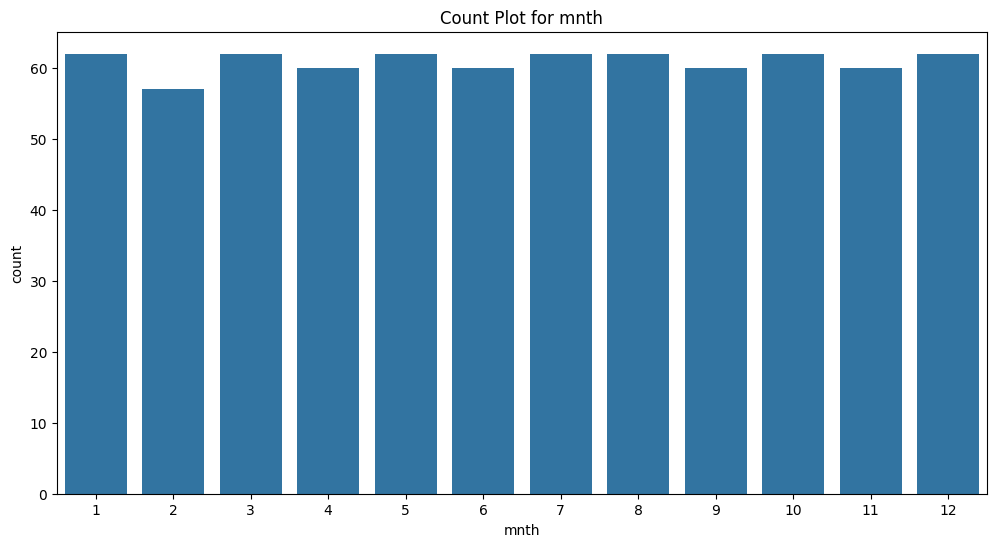

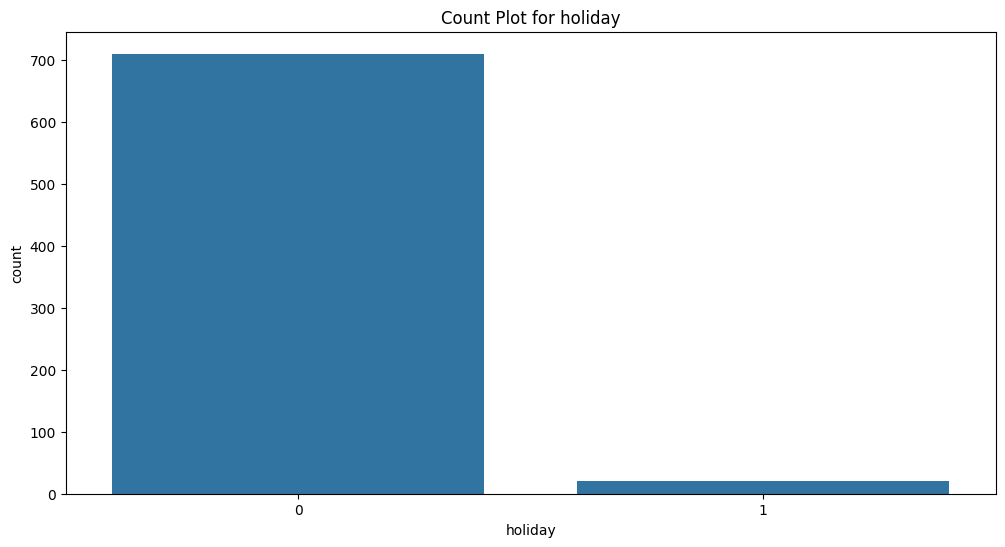

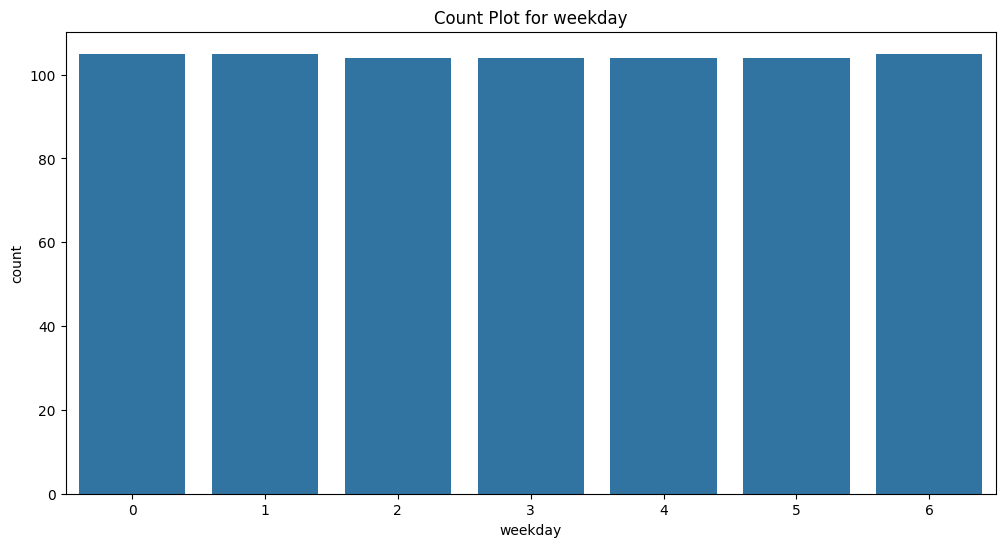

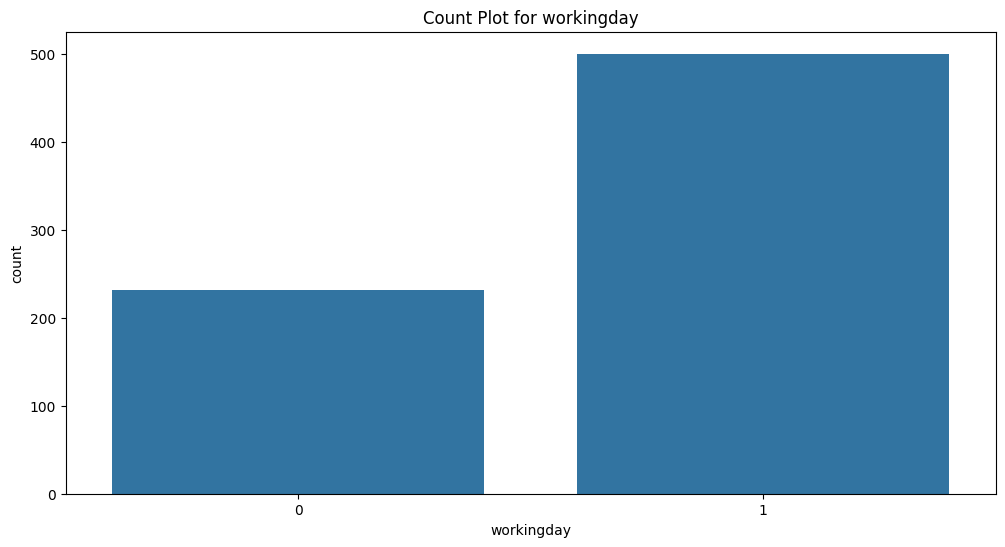

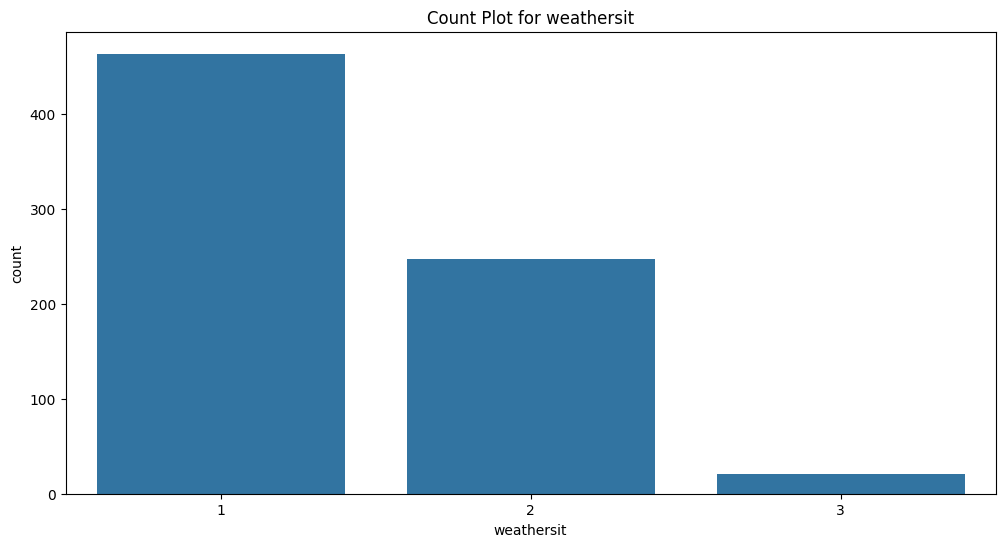

In [12]:
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_columns:
  plt.figure(figsize=(12,6))
  sns.countplot(data=day, x=col)
  plt.title('Count Plot for '+col)
  plt.show()

The category values for **season** is as follows,

1: winter

2: spring

3: summer

4: fall


<br>

And as for **weathersit** is as follows,

1: clear

2: few clouds

3: partly clouds

Other categorical details are easy to grasp in the dataset.

In [13]:
# Analyzing the dataset with correlation of columns,
day_corr = day.corr()

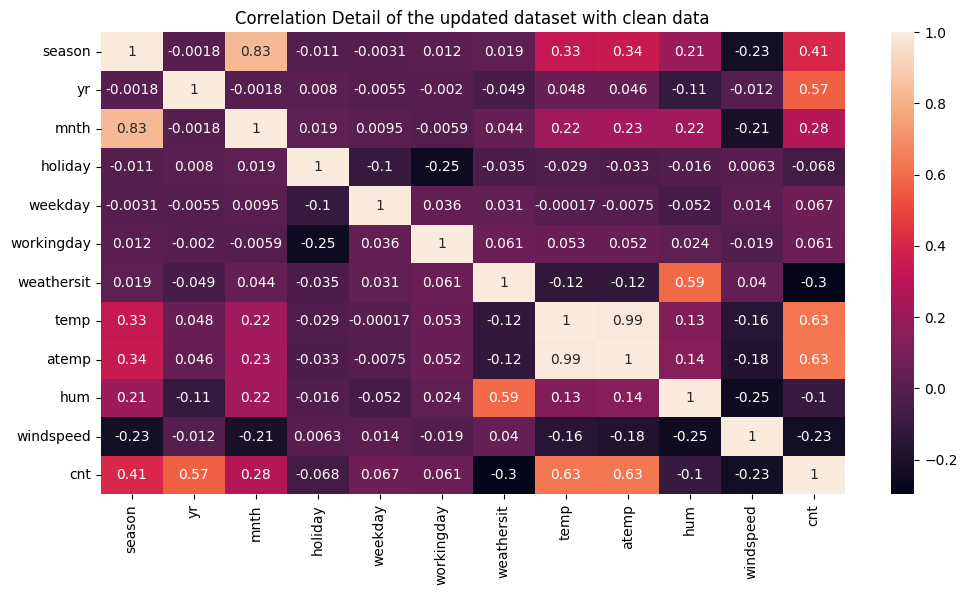

In [14]:
# The dataset correlation is now interprated on heatmap graph
plt.figure(figsize=(12,6))
sns.heatmap(day_corr, annot=True)
plt.title('Correlation Detail of the updated dataset with clean data')
plt.show()

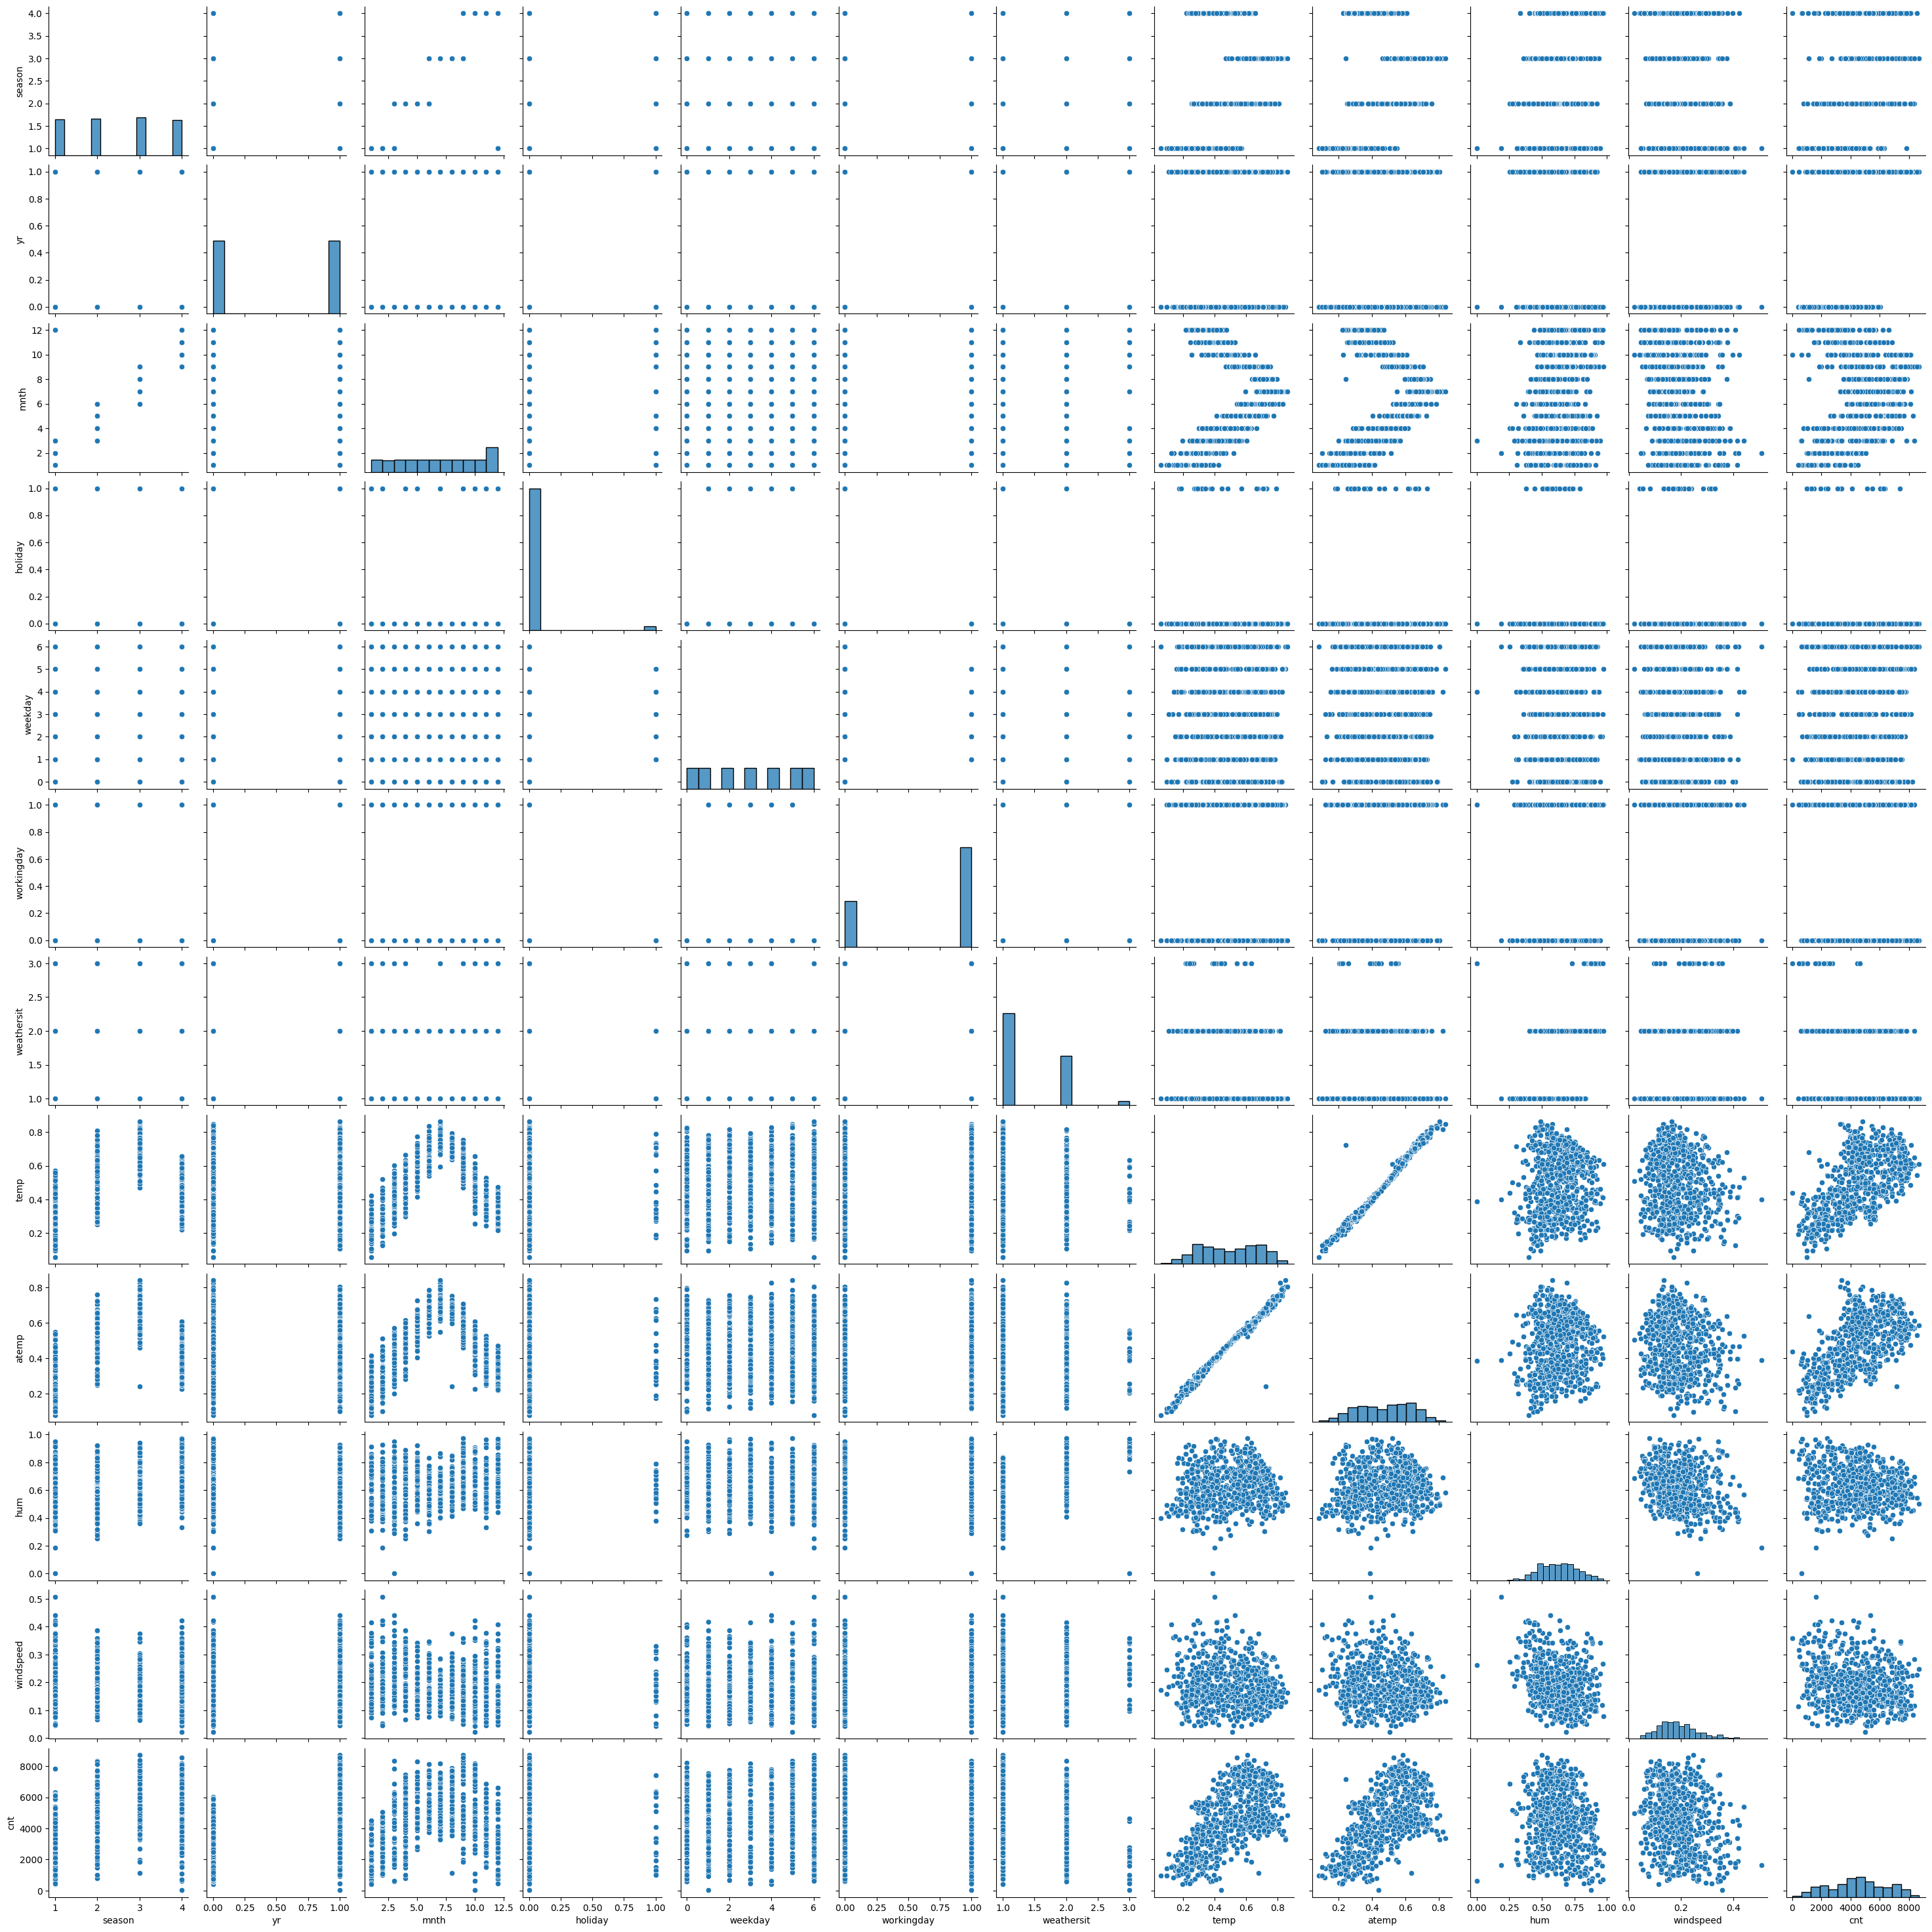

In [15]:
# Now that we can move towards the visual relation between features as given by, pairplot

sns.pairplot(day)
plt.show()

The data set contains various features with simplified name related to the context of dataset which are explained as below:

**temp:** Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39

**atemp:** Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50

**windspeed:** Normalized wind speed. The values are divided to 67 (max)

**hum:** Normalized humidity. The values are divided to 100 (max)

---------------------------------------
***Targeted Variable,***

**cnt:** Count of total rental bikes including both casual and registered

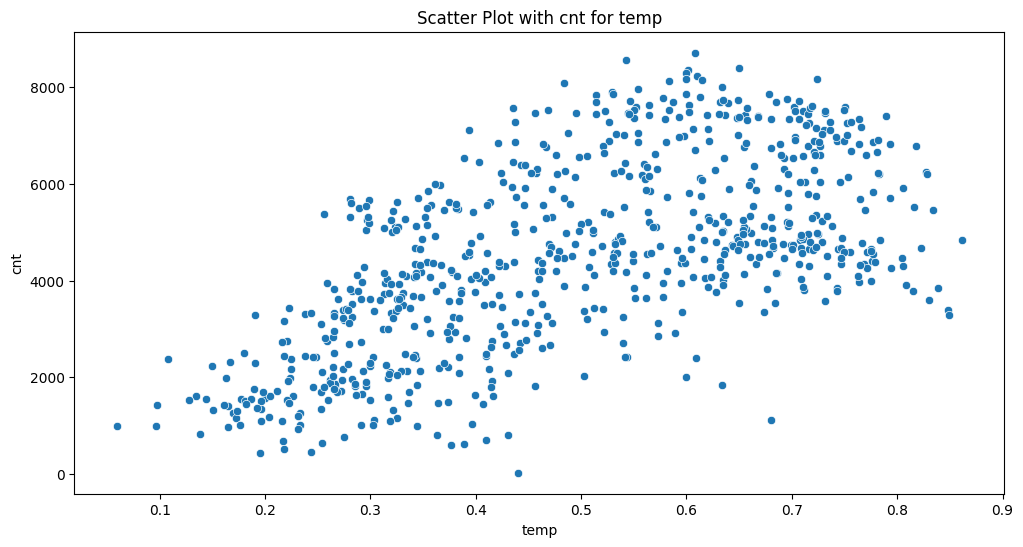

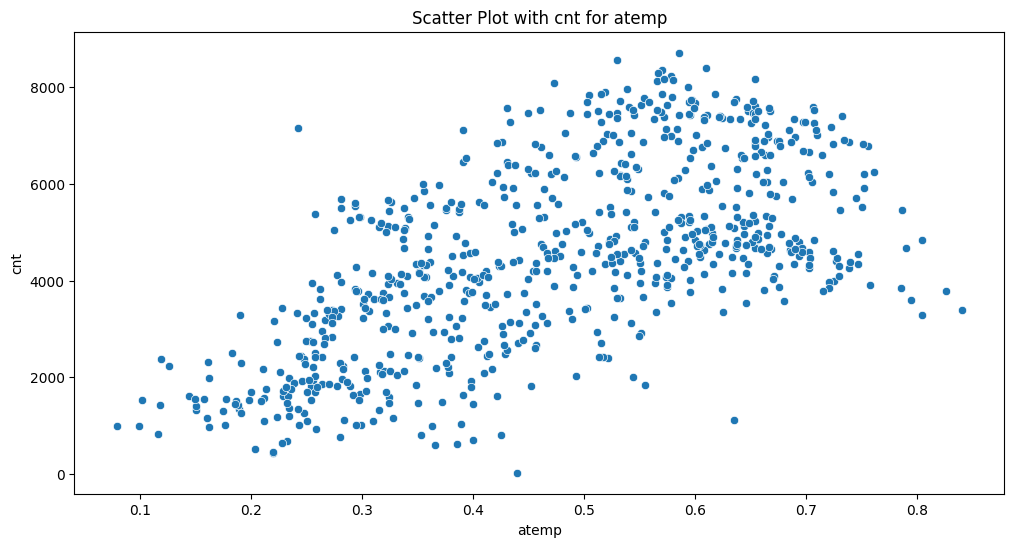

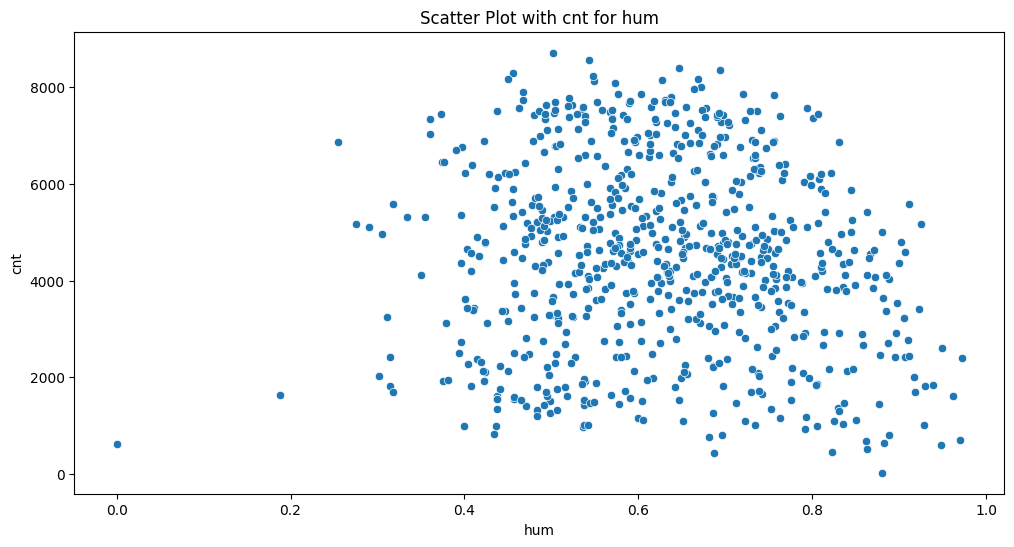

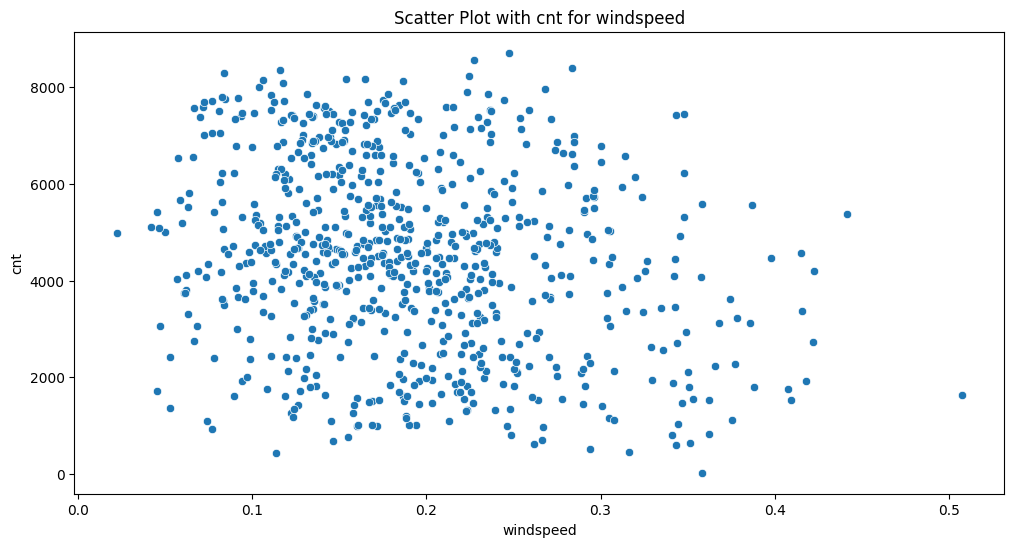

In [16]:
# there are few numerical features as well whose relation can be found with cnt i.e. count of total rental bikes including both casual and registered
# Displaying the numerical is done using scatter plot and box plot

# list of numerical features,
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed']

# Scatterplot is generated

for cols in numerical_cols:
  plt.figure(figsize=(12,6))
  sns.scatterplot(data=day, x=cols, y='cnt')
  plt.title('Scatter Plot with cnt for '+cols)
  plt.show()

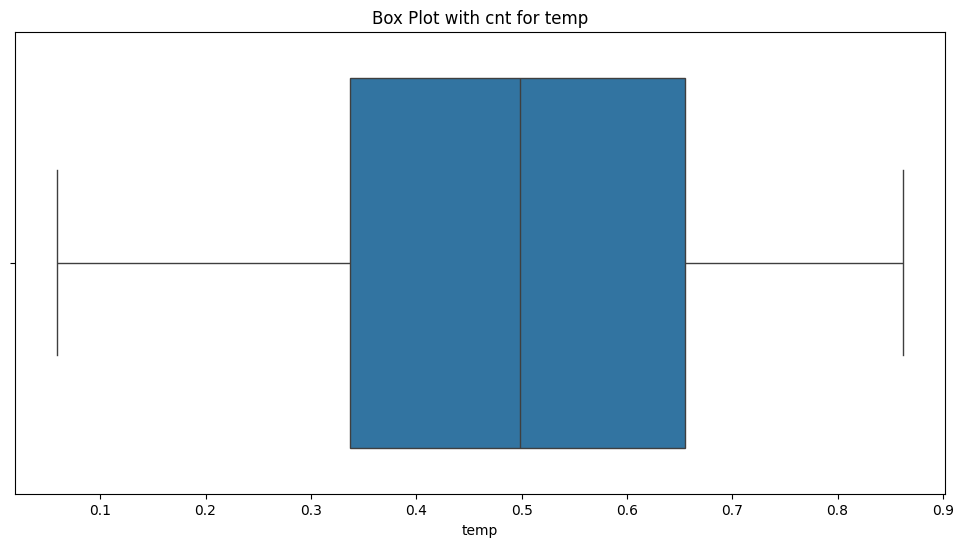

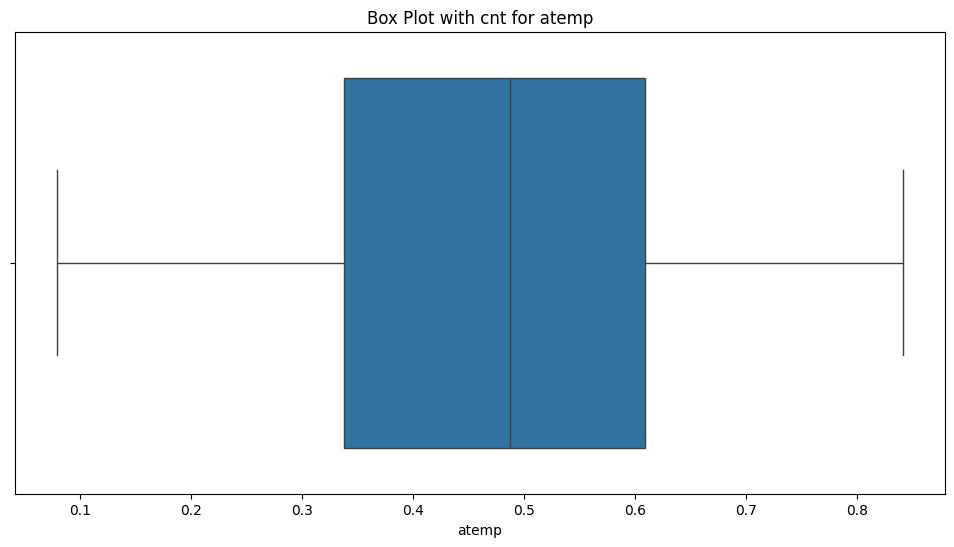

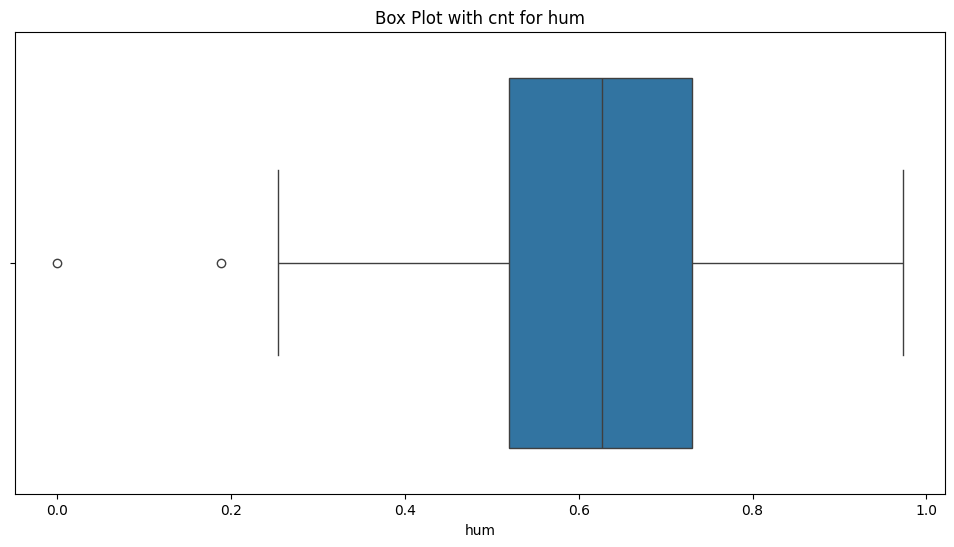

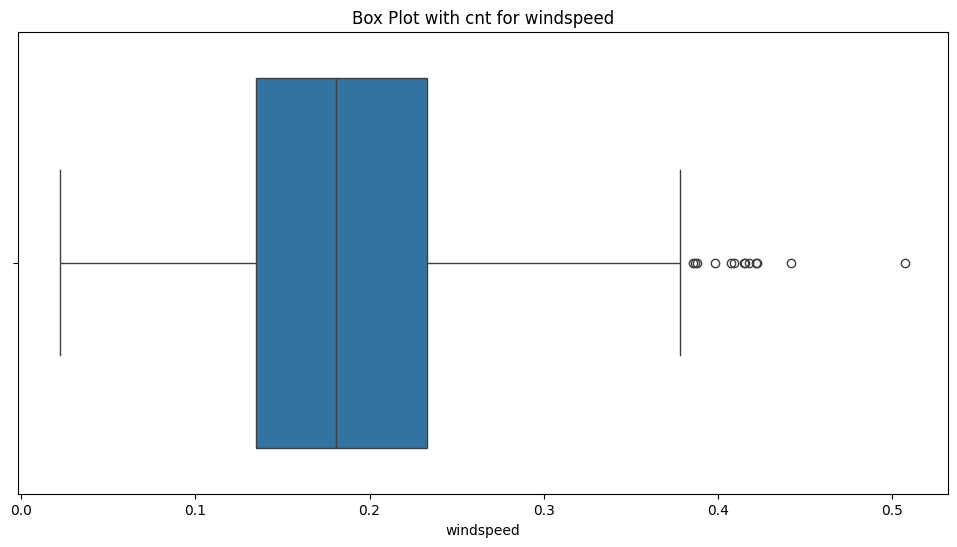

In [17]:
# Creating box plots for the numerical datasets to compare with cnt
for cols in numerical_cols:
  plt.figure(figsize=(12,6))
  sns.boxplot(data=day, x=cols)
  plt.title('Box Plot with cnt for '+cols)

With this we have got the certain visual insights of outliers in the numerical columns.

### Analysis by grouping week, month and seasons

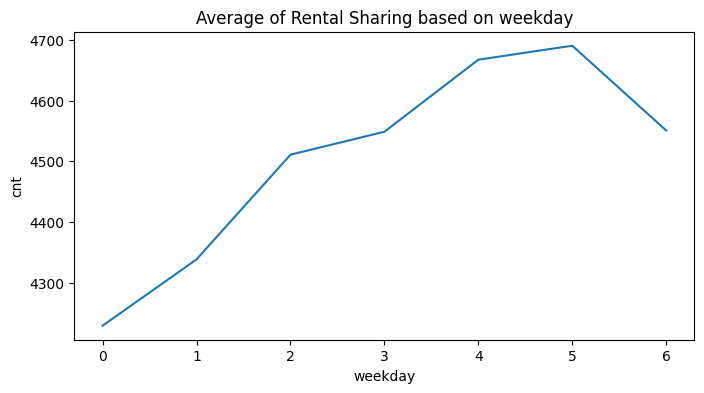

In [18]:
# Grouping by weekday and ploting the average count of rental sharing
trend_weekday = day.groupby('weekday')['cnt'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data= trend_weekday, x = 'weekday', y='cnt')
plt.title('Average of Rental Sharing based on weekday')
plt.show()

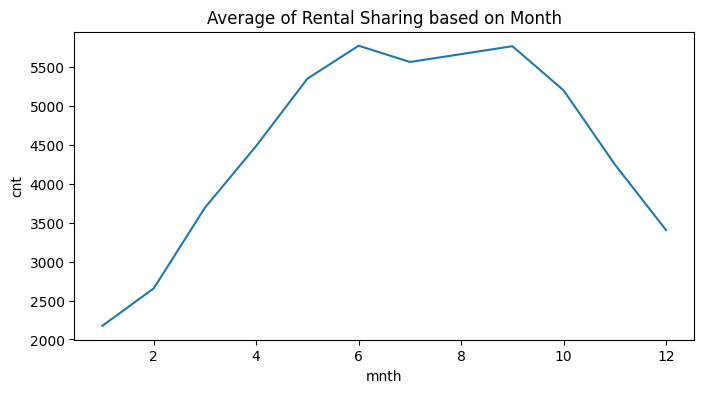

In [19]:
# Grouping by monthly and ploting thr mean count of rental sharing
trend_monthly = day.groupby('mnth')['cnt'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=trend_monthly, x='mnth', y='cnt')
plt.title('Average of Rental Sharing based on Month')
plt.show()

**Note:** The values for seasonal keys are as follows,

1:winter

2:spring

3:summer

4:fall

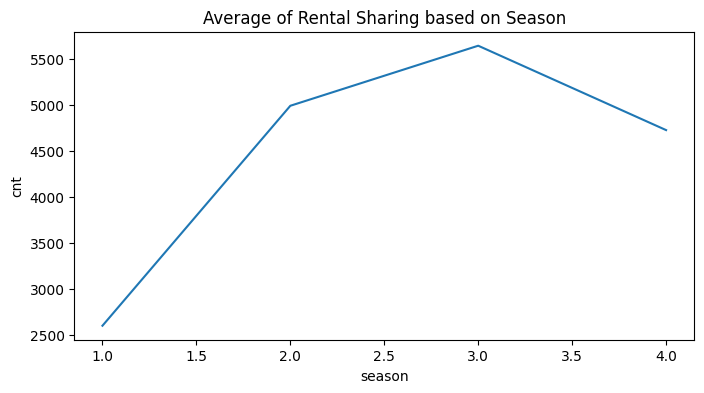

In [20]:
# Grouping by season and ploting thr mean count of rental sharing
trend_seasonaly = day.groupby('season')['cnt'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=trend_seasonaly, x='season', y='cnt')
plt.title('Average of Rental Sharing based on Season')
plt.show()

### Target variable Visual analysis

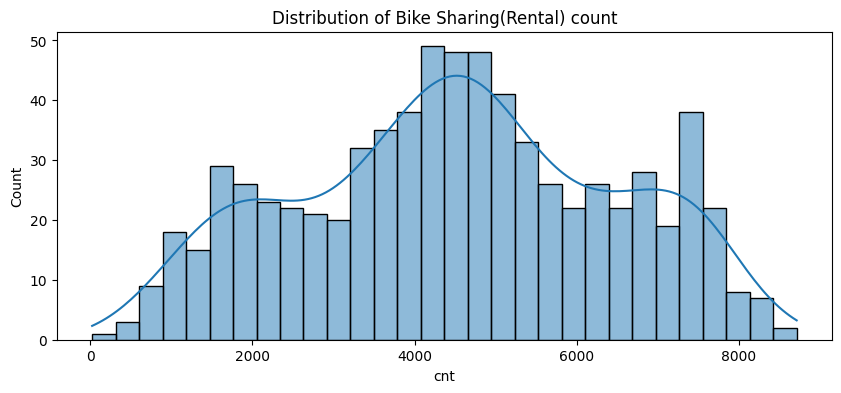

In [21]:
# For visualizing the targeted variable, histogram plot can be used
plt.figure(figsize=(10,4))
sns.histplot(day['cnt'], bins=30, kde=True)
plt.title('Distribution of Bike Sharing(Rental) count')
plt.show()

## part-III Building Models

In [22]:
# Importing all the required imports from sklearn required further in model building
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [23]:
# Placing the independent features on X variable and targeted cnt feature on y variable from day dataset
X = day.drop('cnt', axis=1)
y = day['cnt']

In [24]:
# Splitting the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7777)

In [25]:
# Reviewing the shape of testing and training data
print('X_train: ', X_train.shape, '& X_trst: ', X_test.shape)
print('y_train: ', y_train.shape, '& y_trst: ', y_test.shape)

X_train:  (584, 11) & X_trst:  (147, 11)
y_train:  (584,) & y_trst:  (147,)


In [26]:
# using multiple regression models to findout the suitable to proceed forward

models = {
    'Linear Regressor': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=7777),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=7777)
}

# Creating a function to use and evaluate models they are evaluated using Root Mean Squared Error(RMSE)

def model_eval(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  return rmse

for model_name, model in models.items():
  rmse = model_eval(model, X_train, X_test, y_train, y_test)
  print(model_name,"'s Rmse: ",rmse)


Linear Regressor 's Rmse:  993.5164557498757
Random Forest Regressor 's Rmse:  828.4747738120076
Gradient Boosting Regressor 's Rmse:  722.3212577115959


The good news is that Linear Regression have exceptional low rmse but although low rmse the bad thing is that it indicates overfitting too. This leaves with other two models i.e. RFR and GBR. Lets figure out the suitable model after hyper parameter tuning.


In [27]:
# Lets use grid search cv to figure out suitable parameters for each of the models

# Parameter grid for Random Forest Regressor
parameters_grid_rfr = {
    'n_estimators': [100,200,300],
    'max_depth': [10,20,30],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
rfr = RandomForestRegressor(random_state = 7777)

rfr_gridsearch = GridSearchCV(estimator = rfr, param_grid = parameters_grid_rfr, cv = 4, n_jobs=-1, verbose = 2)

rfr_gridsearch.fit(X_train, y_train)

print('Best parameters for RFR models:')
print(rfr_gridsearch.best_params_)

Fitting 4 folds for each of 81 candidates, totalling 324 fits
Best parameters for RFR models:
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [28]:
# Parameter grid for Gradient Boosting Regressor
parameters_grid_gbr = {
    'n_estimators': [100,200,300],
    'max_depth': [3,4,5],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10],
    'learning_rate': [0.01, 0.1, 0.2]
}

gbr = GradientBoostingRegressor(random_state=7777)

gbr_gridsearch = GridSearchCV(estimator = gbr, param_grid = parameters_grid_gbr, cv = 4, n_jobs = -1, verbose = 2)
gbr_gridsearch.fit(X_train, y_train)

print('Best parameters for GBR models:')
print(gbr_gridsearch.best_params_)

Fitting 4 folds for each of 243 candidates, totalling 972 fits
Best parameters for GBR models:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


Now again lets re create the models and with best rmse value we will finalize the model.

In [29]:
# Lets again check and re-evaluate the linear Regression nodel and check its rmse
finalized_lr_model = LinearRegression()
finalized_lr_model.fit(X_train, y_train)
# Predicting and evaluating teh model
y_pred_for_finalized_lr = finalized_lr_model.predict(X_test)
finalized_lr_rmse = mean_squared_error(y_test, y_pred_for_finalized_lr, squared=False)
print('Finalized Linear Regression Model RMSE: ',finalized_lr_rmse)

Finalized Linear Regression Model RMSE:  993.5164557498757


In [30]:
# Checking the finalized lr models cross validation in order to verify if there is data leakage or overfitting
cv_scores = cross_val_score(finalized_lr_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = (-cv_scores.mean()) ** 0.5
print(f'Cross-Validated RMSE for Linear Regression: {cv_rmse}')

Cross-Validated RMSE for Linear Regression: 1007.6001127052442


In [31]:
# Lets re create the RFR model with hyperparameert tuning and get its rms

finalized_rfr_model = RandomForestRegressor(
    n_estimators=rfr_gridsearch.best_params_['n_estimators'],
    max_depth = rfr_gridsearch.best_params_['max_depth'],
    min_samples_leaf = rfr_gridsearch.best_params_['min_samples_leaf'],
    min_samples_split = rfr_gridsearch.best_params_['min_samples_split'],
    random_state = 7777
)

finalized_rfr_model.fit(X_train, y_train)

#Predicting and evaluating the finalixed RFR model
y_pred_for_finalized_rfr = finalized_rfr_model.predict(X_test)
finalized_rfr_rmse = mean_squared_error(y_test, y_pred_for_finalized_rfr, squared = True)
print('Finalized Random Forest Regressor RMSE: ',finalized_rfr_rmse)

Finalized Random Forest Regressor RMSE:  678523.088909297


In [32]:
# Likewise re creating the GBR model with its suitable hyperparameters and get its rmse

finalized_gbr_model = GradientBoostingRegressor(
    n_estimators=gbr_gridsearch.best_params_['n_estimators'],
    learning_rate = gbr_gridsearch.best_params_['learning_rate'],
    max_depth = gbr_gridsearch.best_params_['max_depth'],
    min_samples_leaf = gbr_gridsearch.best_params_['min_samples_leaf'],
    min_samples_split = gbr_gridsearch.best_params_['min_samples_split'],
    random_state = 7777
)

finalized_gbr_model.fit(X_train, y_train)

#Predicting and evaluating the finalixed RFR model
y_pred_for_finalized_gbr = finalized_gbr_model.predict(X_test)
finalized_gbr_rmse = mean_squared_error(y_test, y_pred_for_finalized_gbr, squared = True)
print('Finalized Gradient Boosting Regressor RMSE: ',finalized_gbr_rmse)

Finalized Gradient Boosting Regressor RMSE:  560103.5120928705


The LR model seems to be performing exceptionally and could be said almost perfectly. Now the LR model can be applied and used to perform further specific tasks.<br><br>
The End